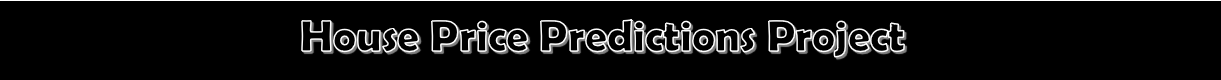

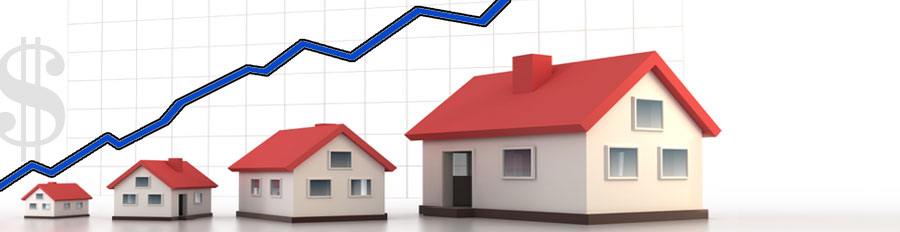

## House Price Prediction Challenge
## Overview
Welcome to the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.

Also, in this competition, you will get a lot of room for feature engineering and mastering advanced regression techniques such as Random Forest, Deep Neural Nets, and various other ensembling techniques.

# Features
1. Room :-
2. bathroom :-
3. kitchen:-
4. french_door	
5. backyard	
6. furnished	
7. green_paint	
8. solar_power	
9. woodfloor	
10. qlm_security	
11. club_access	
12. price

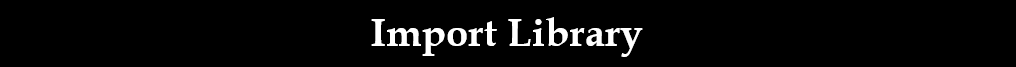

In [165]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns
from sklearn.linear_model import LinearRegression,RANSACRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

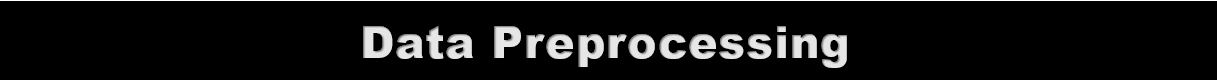

In [166]:
train=pd.read_csv("msc_training_dataset.csv")
test=pd.read_csv("msc_testing_dataset.csv")

In [167]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [168]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


## cheaking the shape of the train and Test data

In [169]:
# There is 12 columns and 3000 rows in train dataset
train.shape

(3000, 12)

In [170]:
#Here is also Same like train dataset but Here Number of Rows is Different from train dataset
#   999 rows in test data
test.shape

(999, 12)

In [171]:
# INformation of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [23]:
# Information of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


In [24]:
# Statistics
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


Describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values. When this method is applied to a series of strings, it returns a different output 

percentile: list like data type of numbers between 0-1 to return the respective percentile 
include: List of data types to be included while describing dataframe. Default is None 
exclude: List of data types to be Excluded while describing dataframe. Default is None 

In [26]:
cor=train.corr()
cor

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
room,1.000000,0.015766,0.021865,0.010350,0.001269,0.004055,-0.015667,-0.006147,0.013754,-0.024165,0.001400,0.649354
bathroom,0.015766,1.000000,-0.014383,0.011027,0.011580,-0.010504,0.035364,-0.022864,0.001877,-0.024208,-0.028021,0.062724
kitchen,0.021865,-0.014383,1.000000,-0.021661,-0.001151,0.002334,-0.023380,0.003718,-0.009764,0.023074,0.003366,0.122804
french_door,0.010350,0.011027,-0.021661,1.000000,0.009392,-0.010299,0.010193,-0.014368,0.017686,-0.025928,-0.015171,0.087913
backyard,0.001269,0.011580,-0.001151,0.009392,1.000000,-0.002439,0.002088,-0.005502,0.011149,-0.012092,-0.022684,0.125625
furnished,0.004055,-0.010504,0.002334,-0.010299,-0.002439,1.000000,0.032009,-0.019536,0.007897,-0.014224,0.016656,0.452742
green_paint,-0.015667,0.035364,-0.023380,0.010193,0.002088,0.032009,1.000000,-0.008264,-0.011268,-0.005834,-0.018695,0.077428
solar_power,-0.006147,-0.022864,0.003718,-0.014368,-0.005502,-0.019536,-0.008264,1.000000,-0.019793,-0.003671,-0.013340,0.317680
woodfloor,0.013754,0.001877,-0.009764,0.017686,0.011149,0.007897,-0.011268,-0.019793,1.000000,0.004292,0.006685,0.434485
qlm_security,-0.024165,-0.024208,0.023074,-0.025928,-0.012092,-0.014224,-0.005834,-0.003671,0.004292,1.000000,0.028662,0.079210


Describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values. When this method is applied to a series of strings, it returns a different output 


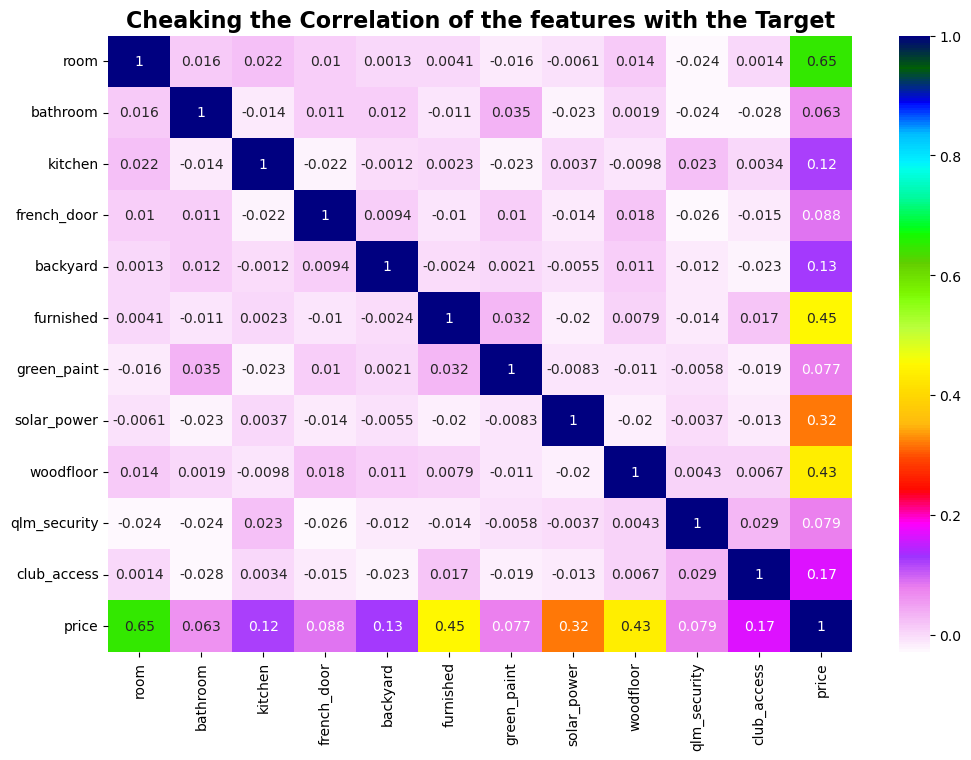

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap="gist_ncar_r")
plt.title("Cheaking the Correlation of the features with the Target",fontweight="bold",fontsize=16,color="black")
plt.show()

# Insights :-
* Here is All features are Highly Co-Related with the Target.
* Club_Accsess and Kitchen both not highly Co-related. 

Linear regression is a useful statistical method we can use to understand the relationship between two variables, x and y. However, before we conduct linear regression, we must first make sure that four assumptions are met:

1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed.

If one or more of these assumptions are violated, then the results of our linear regression may be unreliable or even misleading.

## Cheaking The Null Values from train and Test datasets

In [36]:
train.isna().sum().reset_index().rename(columns={"index":"columns",0:"Error_values"})

,columns,Error_values
0,room,0
1,bathroom,0
2,kitchen,0
3,french_door,0
4,backyard,0
5,furnished,0
6,green_paint,0
7,solar_power,0
8,woodfloor,0
9,qlm_security,0


#### There is No Null values in this train dataset

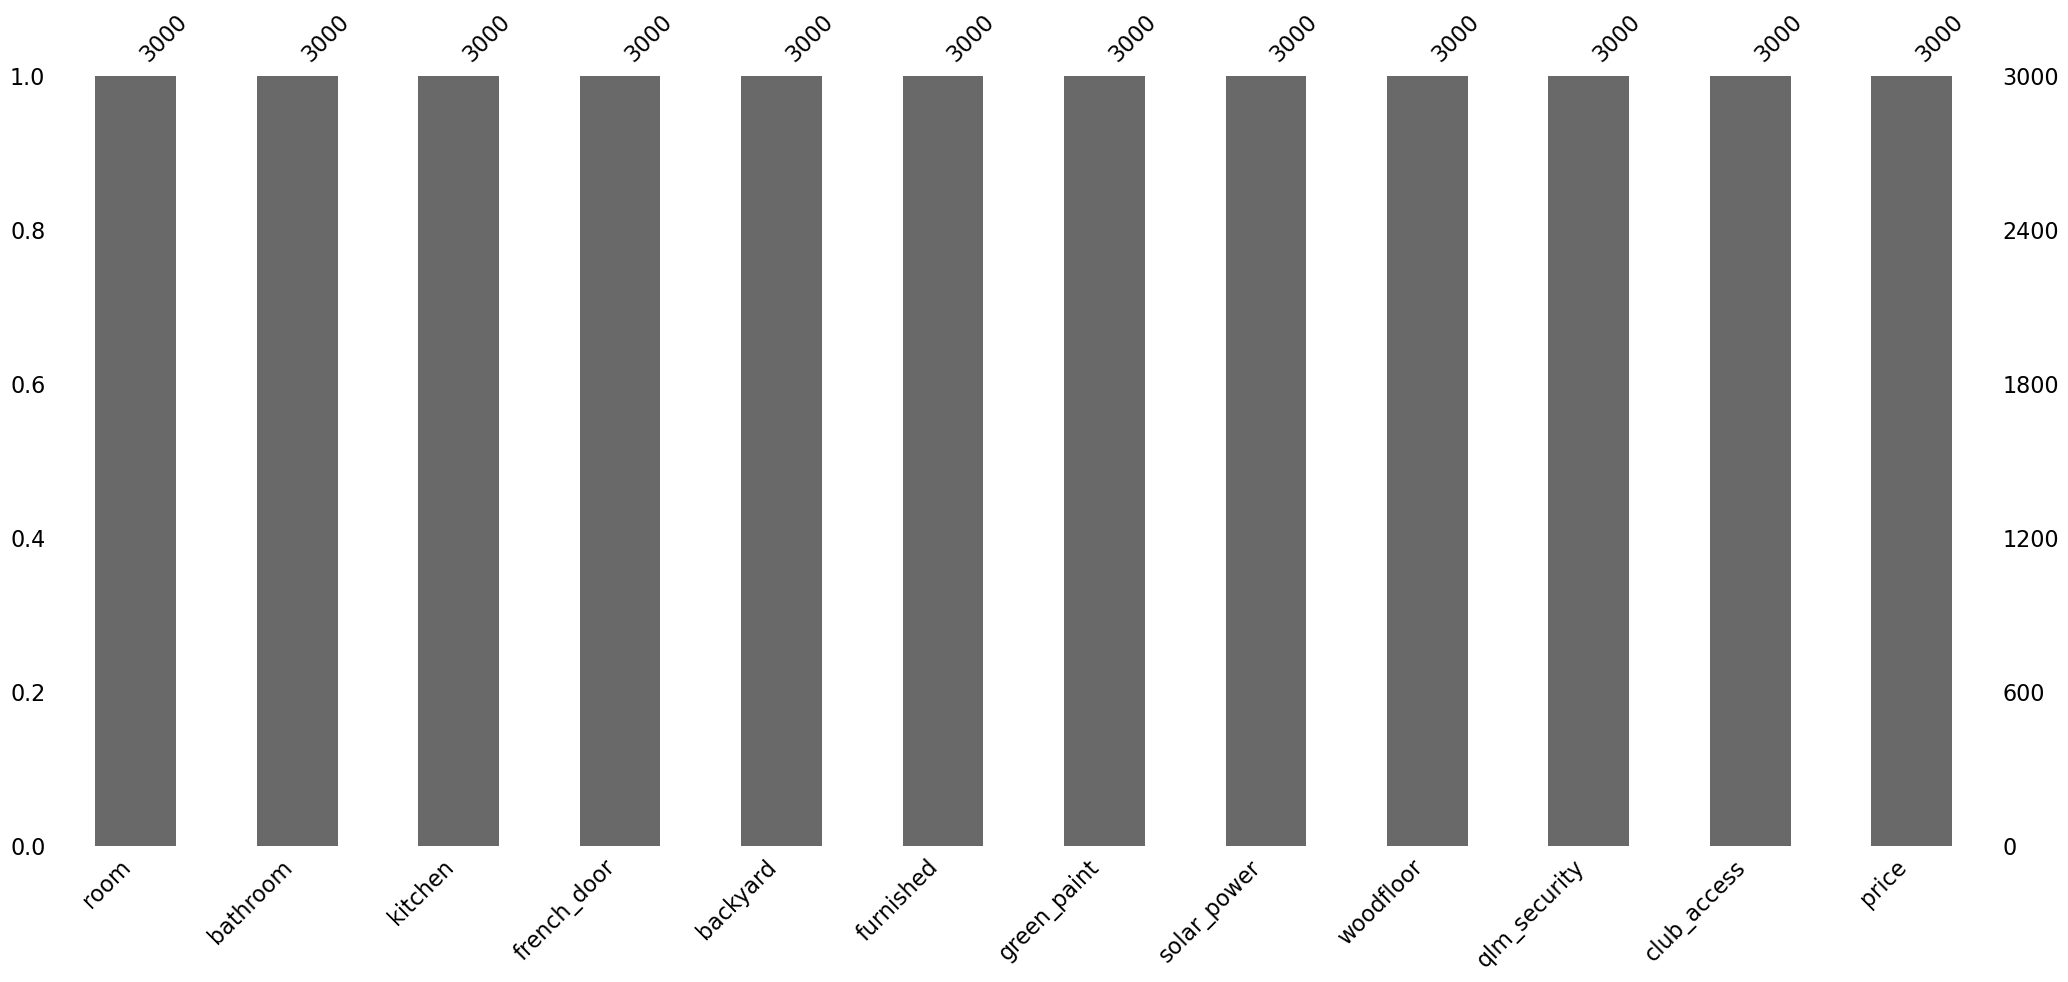

In [39]:
mns.bar(train);

In [37]:
test.isna().sum().reset_index().rename(columns={"index":"columns",0:"Error_values"})

,columns,Error_values
0,room,0
1,bathroom,0
2,kitchen,0
3,french_door,0
4,backyard,0
5,furnished,0
6,green_paint,0
7,solar_power,0
8,woodfloor,0
9,qlm_security,0


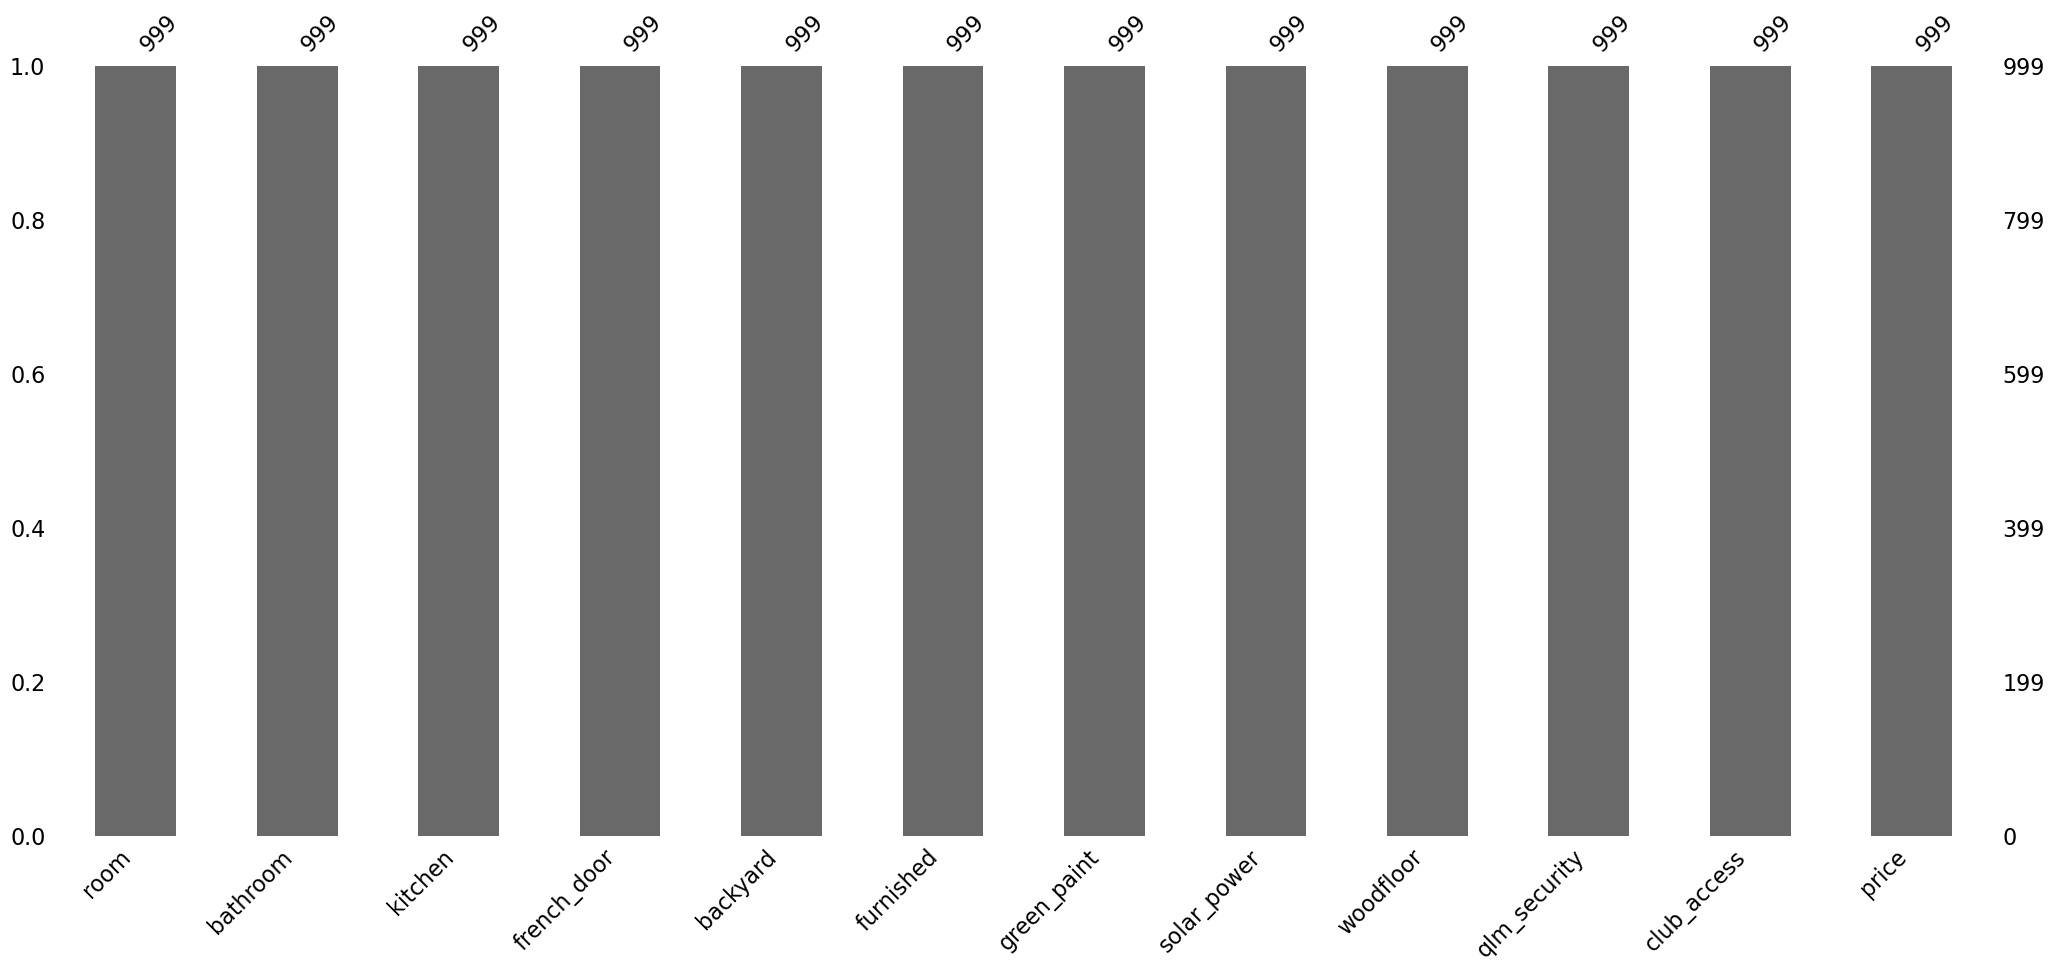

In [40]:
mns.bar(test);

### Here is No Null Value in this test dataset

In [41]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [42]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178




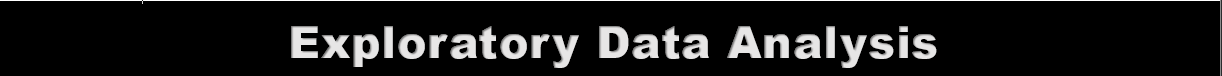

In [45]:
# cheaking the unique values in Feature
train.nunique()

room              5
bathroom          2
kitchen           2
french_door       3
backyard          2
furnished         2
green_paint       2
solar_power       2
woodfloor         2
qlm_security      2
club_access       2
price           856
dtype: int64

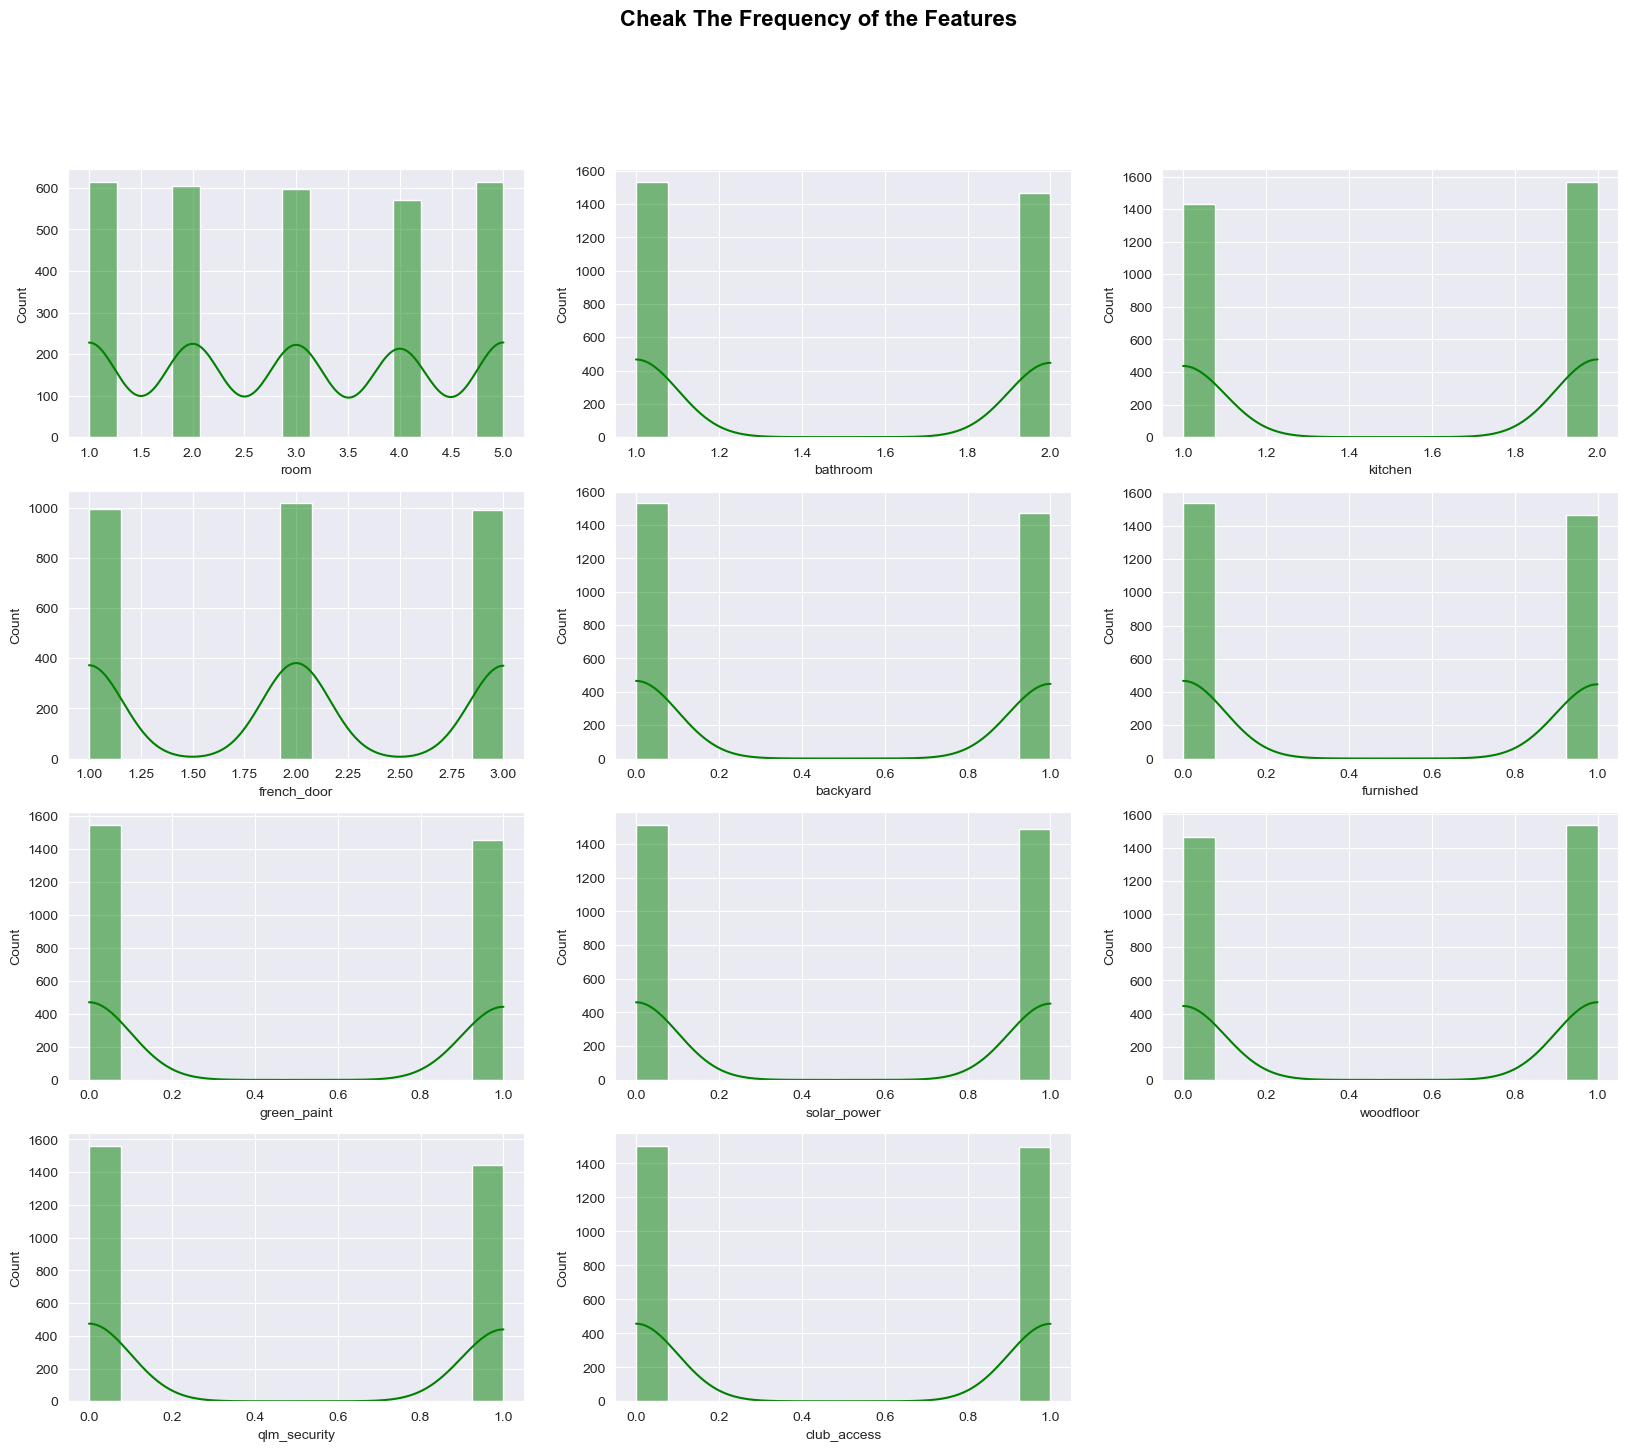

In [55]:
sns.set_style("darkgrid")
i=1
plt.figure(figsize=(20,16))
for l,j in enumerate(train):
    if j=="price":
        pass
    else:
        plt.subplot(4,3,i)
        sns.histplot(data=train,x=j,color='green',kde=True)
        i+=1
plt.suptitle("Cheak The Frequency of the Features",fontweight="bold",fontsize=16,color="black")
plt.show()

## INsights :-
* Here feature are looks Like same
* Here is Multi colinerity in this features

Text(0.5, 1.0, 'Finding the Relation Between the room and price')

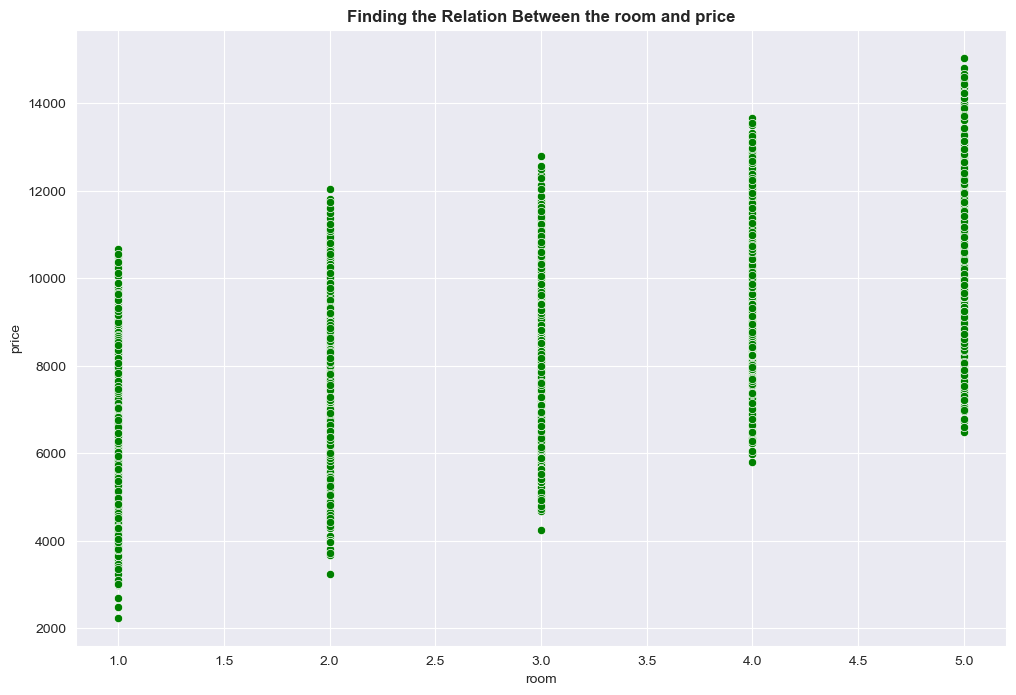

In [53]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.scatterplot(data=train,x="room",y="price",color="green")
plt.title("Finding the Relation Between the room and price",fontweight="bold")

# insights :-
1. Here I can see that as the room is increasing, the price is also increasing

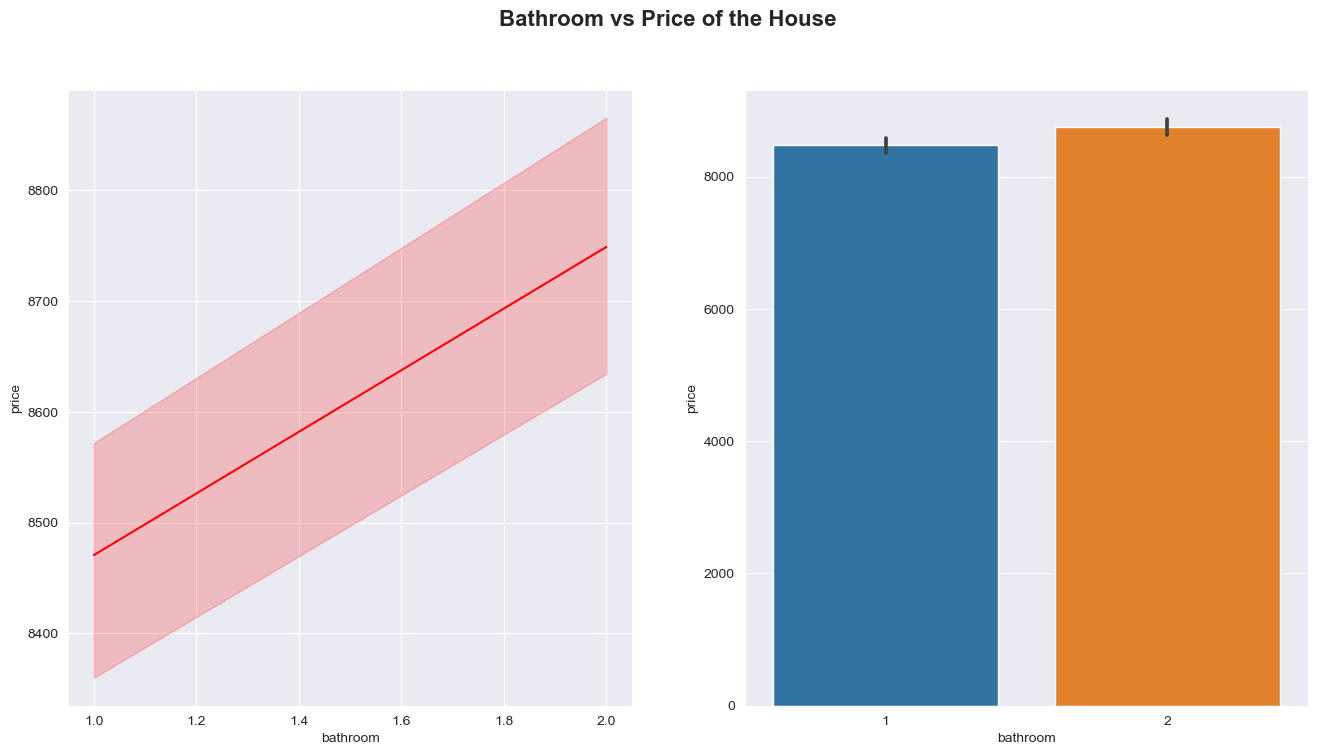

In [61]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.lineplot(data=train,x="bathroom",y="price",color="red")
plt.subplot(1,2,2)
sns.barplot(data=train,x="bathroom",y="price")
plt.suptitle("Bathroom vs Price of the House",fontweight="bold",fontsize=16)
plt.show()

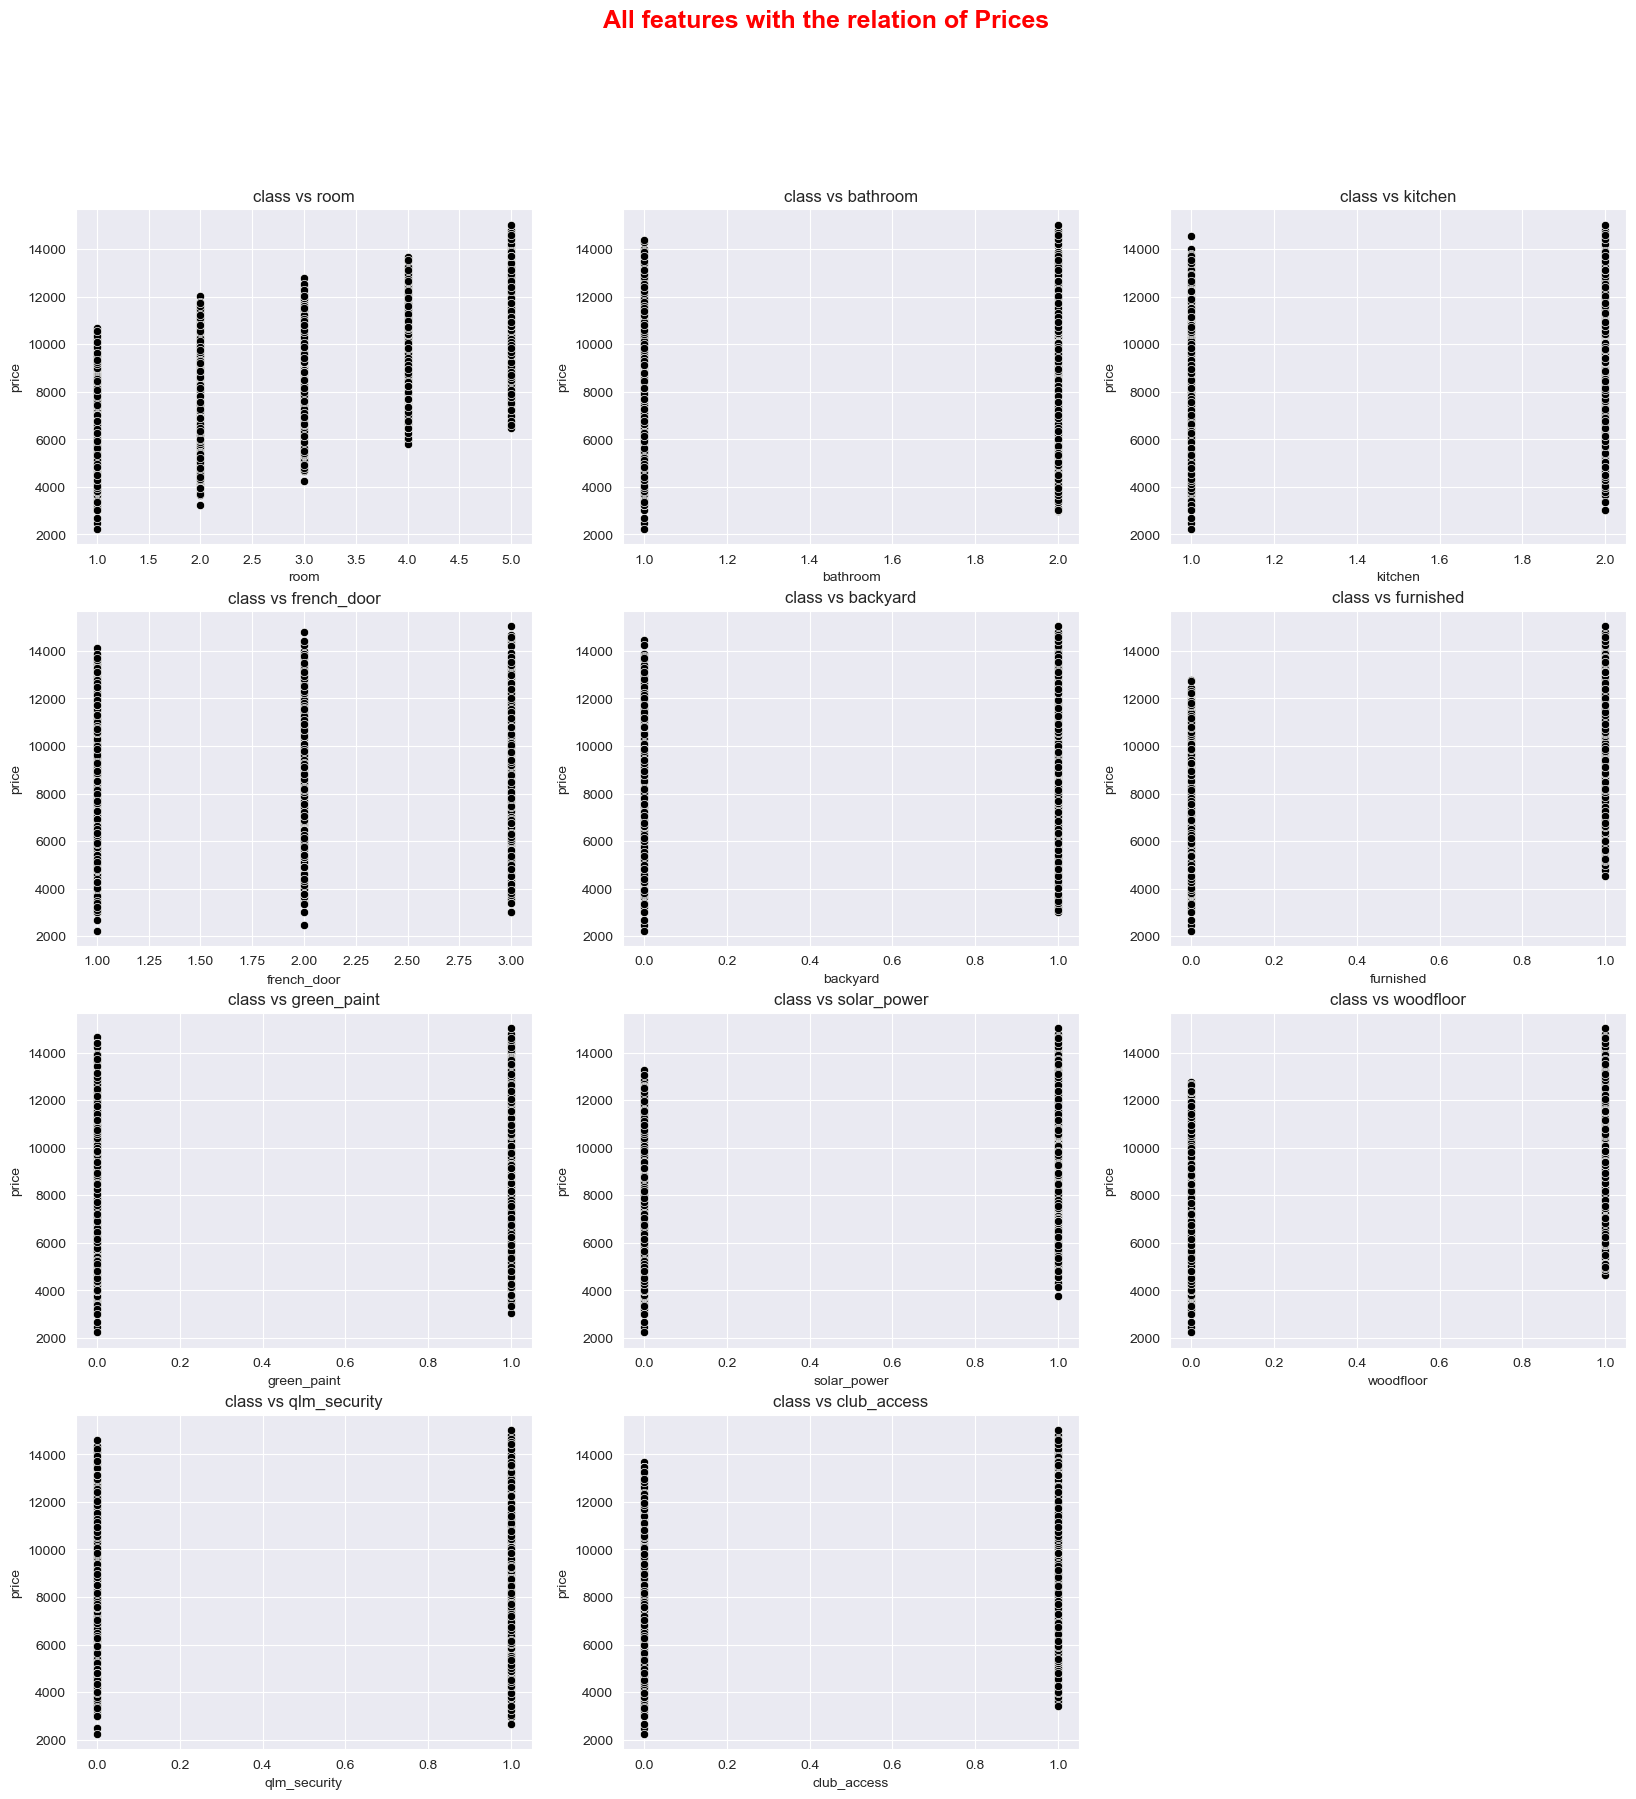

In [68]:
x=1
plt.figure(figsize=(20,20))
for i in train:
    if i=="price":
        continue
    else:
        plt.subplot(4,3,x)
        sns.scatterplot(data=train,x=i,y="price",ci=50,markers="*",color="black")
        plt.title(f"class vs {i}")
        x+=1
plt.suptitle("All features with the relation of Prices",fontweight="bold",fontsize=18,color="red")   
plt.show()

## All the features are connected to the price one.

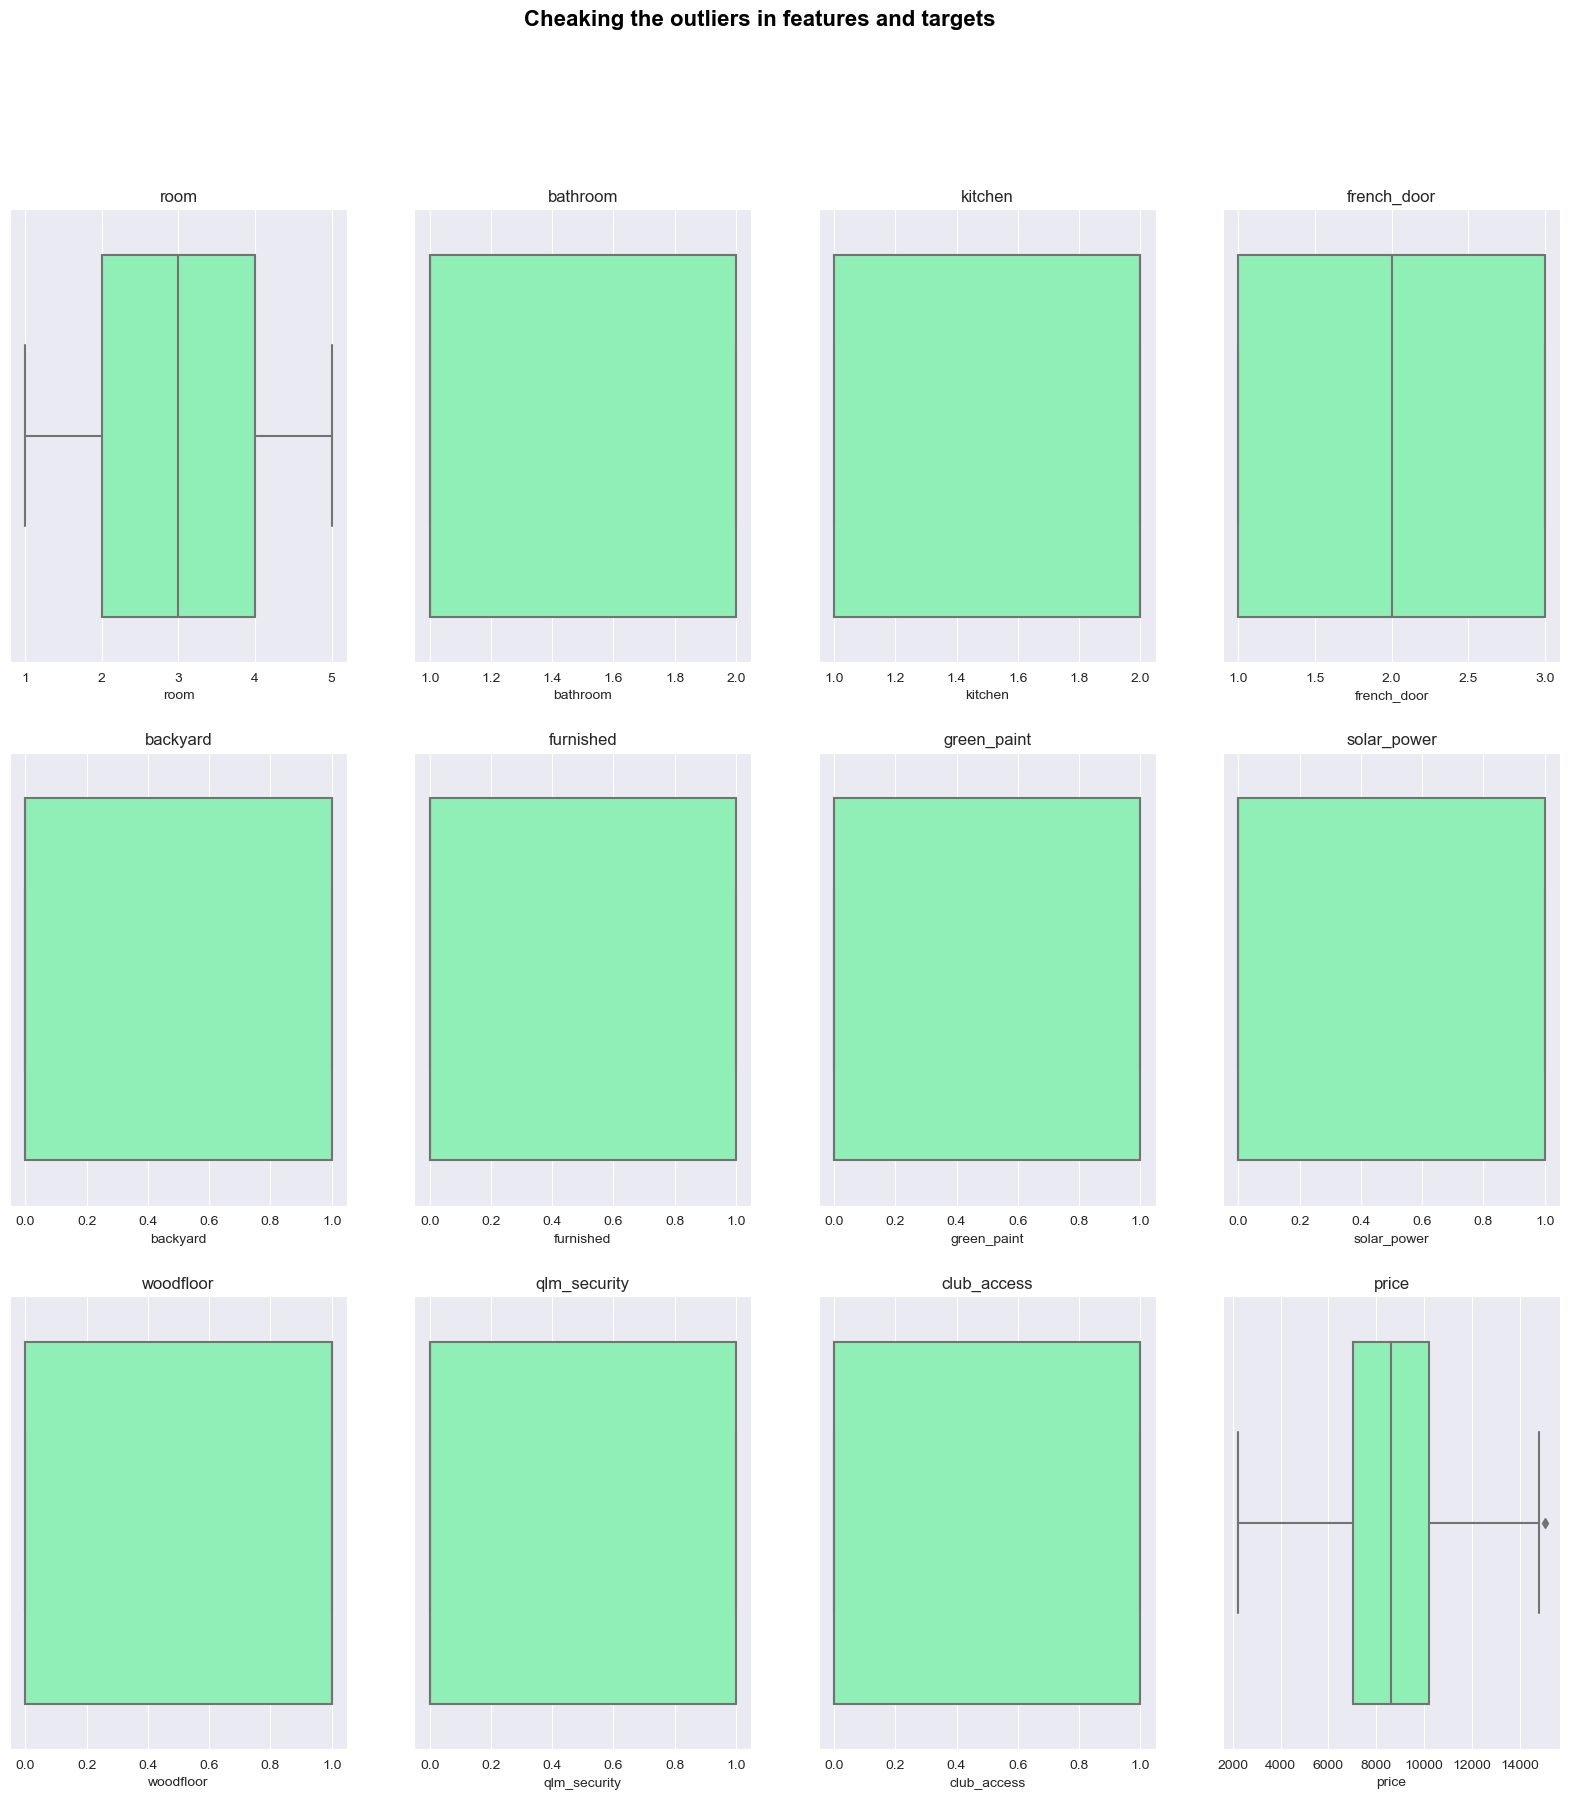

In [72]:
y=1
plt.figure(figsize=(20,20))
for i in train:
    plt.subplot(3,4,y)
    sns.boxplot(data=train,x=i,palette="rainbow")
    plt.title(i)
    y+=1
plt.suptitle("Cheaking the outliers in features and targets",fontweight="bold",fontsize=16,color="black")
plt.show()

# here we can see that there is one outlier in price column

In [73]:
train.tail()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
2995,1,1,2,1,1,0,0,1,0,0,0,4825
2996,1,1,2,3,0,1,1,0,0,1,1,6755
2997,2,2,1,2,0,0,1,1,1,0,0,7565
2998,4,1,1,2,1,1,1,0,0,0,1,9135
2999,4,2,1,1,0,0,0,1,1,0,0,8955


In [74]:
test.tail()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
994,5,2,2,3,1,1,0,0,0,0,0,10088
995,5,1,2,3,1,1,0,0,0,0,0,9788
996,3,2,2,1,0,1,1,1,0,1,0,9388
997,3,2,1,1,1,0,0,1,1,0,0,8528
998,2,1,2,1,0,1,1,0,0,0,0,6118


### Now extract the Features and target from the train data and test data

In [75]:
x_train=train.drop("price",axis=1)

In [76]:
x_train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
2,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0


In [77]:
y_train=train[["price"]]

In [79]:
y_train.T

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
price,6835,9005,9005,5105,9105,8995,6805,4935,9895,6365,...,8855,7695,10935,4815,9855,4825,6755,7565,9135,8955


### test data in Extracting the features and Targets


In [80]:
x_test=test.drop("price",axis=1)

In [82]:
x_test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,1,1,1,3,0,0,1,1,0,1,0
1,5,1,1,2,0,0,0,0,0,1,1
2,5,1,1,3,0,0,0,1,1,1,1
3,4,2,2,1,0,1,1,0,0,1,0
4,5,2,1,1,0,1,1,1,0,0,1


In [83]:
y_test=test[["price"]]

In [84]:
y_test.T

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
price,5068,7658,11318,8858,11178,11388,11748,6848,7828,5908,...,6668,10068,11778,9788,5488,10088,9788,9388,8528,6118


In [96]:
x_train.head(3)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
2,5,2,2,2,1,0,0,0,0,1,1


In [97]:
y_train.tail()

,price
2995,4825
2996,6755
2997,7565
2998,9135
2999,8955


## Now i am going to apply the Regression Algorithms
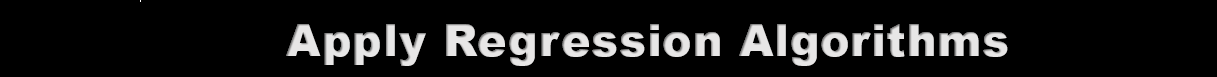


In [103]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [107]:
accuracy_test=lr.score(x_test,y_test)
accuracy_train=lr.score(x_train,y_train)

In [109]:
print("-"*110)
print(f"The Accuracy of the test data is : {accuracy_test}")
print("-"*110)
print(f"The Accuracy of the Train data is : {accuracy_train}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
The Accuracy of the test data is : 0.9999656095212318
--------------------------------------------------------------------------------------------------------------
The Accuracy of the Train data is : 1.0
--------------------------------------------------------------------------------------------------------------


In [111]:
r2=r2_score(y_test,lr.predict(x_test))

In [112]:
print("-"*110)
print(f"R2_score has a Good Accuracy : {r2}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
R2_score has a Good Accuracy : 0.9999656095212318
--------------------------------------------------------------------------------------------------------------


In [117]:
mse=mean_squared_error(y_test,lr.predict(x_test))
mae=mean_absolute_error(y_test,lr.predict(x_test))

In [118]:
print("-"*110)
print(f"The mean squared Error is : {mse}")
print("-"*110)
print(f"Mean Absolute Error is : {mae}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
The mean squared Error is : 168.99999999994918
--------------------------------------------------------------------------------------------------------------
Mean Absolute Error is : 12.999999999998046
--------------------------------------------------------------------------------------------------------------


In [119]:
predictions=lr.predict(x_test)

In [123]:
pred=predictions.flatten()

In [124]:
pred

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

### I am Going to Create the data Frame of Actual Price and Predicted Price of test data

In [130]:
pred.shape

(999,)

In [131]:
y_test.shape

(999, 1)

In [152]:
df=pd.DataFrame({"Actual":y_test["price"],"predicted":pred})

In [153]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
Actual,5068.0,7658.0,11318.0,8858.0,11178.0,11388.0,11748.0,6848.0,7828.0,5908.0,...,6668.0,10068.0,11778.0,9788.0,5488.0,10088.0,9788.0,9388.0,8528.0,6118.0
predicted,5055.0,7645.0,11305.0,8845.0,11165.0,11375.0,11735.0,6835.0,7815.0,5895.0,...,6655.0,10055.0,11765.0,9775.0,5475.0,10075.0,9775.0,9375.0,8515.0,6105.0


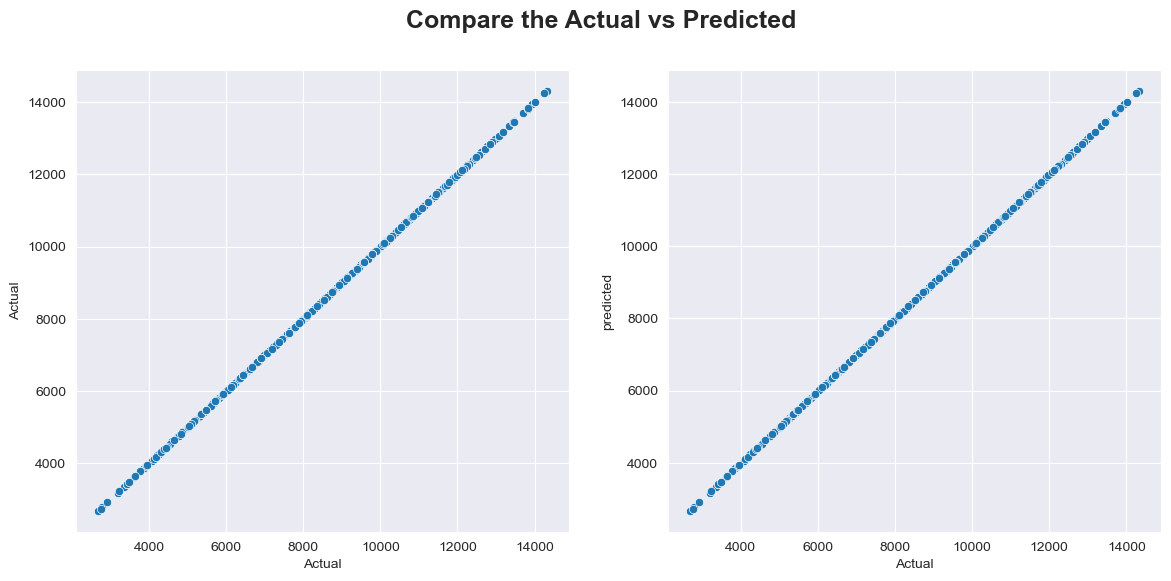

In [164]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x="Actual",y="Actual",palette="gist_ncar_r",ci=50)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x="Actual",y="predicted",palette="rainbow",ci=50)
plt.suptitle("Compare the Actual vs Predicted",fontweight="bold",fontsize=18)
plt.show()

# Inisights :
1. We can see that our machine learning algorithm has predicted well
2. I have used Linear regression 
3. Linear regression gives good accuracy on this data.

## Finally showing the Accuracy of the the model

In [173]:
print("-"*110)
print(f"The Accuracy of the test data is : {accuracy_test}")
print("-"*110)
print(f"The Accuracy of the Train data is : {accuracy_train}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
The Accuracy of the test data is : 0.9999656095212318
--------------------------------------------------------------------------------------------------------------
The Accuracy of the Train data is : 1.0
--------------------------------------------------------------------------------------------------------------


# Done -----------